# Case Study : SACHIN vs VIRAT

### Cricket Career

- Sachin Tendulkar : 1989-2012
    - First ODI Century : 1994
- Virat Kohli : 2008-Present
    - First ODI Century : 2009
    
### Comparision Parameters

- Batting Runs per Innings
- Strike Rate
- Number of 100's
- Number of 50's
- Team Contribution

> Comparing them on the basis of absolute values is not a good criteria.
> So we will compare them on the basis of relative values.

> Normalised Values : Technique to change the values of numeric columns in the dataset to use a common scale.

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
# introducing the dataset
df = pd.read_csv("ODI_data.csv")
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# dataset size
print("rows : ", len(df))
print("columns : ", len(df.columns))

rows :  171968
columns :  28


###### Cleaning the data

In [4]:
# first we are interested in runs, so lets check that column
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [5]:
# above we can find the there is a '-' and nan which may interrupt our analysis

# first lets get rid of '-'
df = df[df["Innings Runs Scored Num"] != '-']

In [6]:
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [7]:
# for removing nan
df = df.dropna(subset = ["Innings Runs Scored Num"])

In [8]:
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [9]:
# now we are done with the runs column

In [10]:
# as we are comparing players of two different generations
# we are interested in the date-time data

df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# converting the Innings Date column into datetime format
# this will help us to extract individual components of a date
df["Innings Date"] = pd.to_datetime(df["Innings Date"])

In [12]:
# extracting year and appending the year column into df
df["Year"] = df["Innings Date"].dt.year

In [13]:
# taking a look of the data now, after adding Year column
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [14]:
df.tail(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
171940,IR Redpath,12,12,21,1.0,0.0,14,1,0,85.71,2,v England,Melbourne,1971-05-01,Australia,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971
171941,RW Marsh,10*,10,24,1.0,1.0,18,2,0,55.55,2,v England,Melbourne,1971-05-01,Australia,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [15]:
# checking the datatype of the columns
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                  object
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                    float64
Innings Balls Faced                      object
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

In [16]:
df["Innings Runs Scored Num"] = df["Innings Runs Scored Num"].astype(int)
df["Innings Balls Faced"] = df["Innings Balls Faced"].astype(int)
df["Innings Not Out Flag"] = df["Innings Not Out Flag"].astype(int)

In [17]:
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                   int32
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                      int32
Innings Balls Faced                       int32
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

In [18]:
# we are ready with the data
# now lets create a separate data for both the players 

# we will take a duration of 11 years after they scored their 1st ODI century

# Sachin : 1994-2004
# Virat : 2009-2019

In [19]:
# data for sachin
sachin_era_df = df[(df.Year >= 1994) & (df.Year <= 2004)]

# data for virat
virat_era_df = df[(df.Year >= 2009) & (df.Year <= 2019)]

In [20]:
# this will return data from the year 1994-2004
sachin_era_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [21]:
# this will return data from the year 2009-2019
virat_era_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [22]:
# Calculating the absolute values

# Batting Runs per Innings = Total runs / Total innings
# Strike Rate = Total runs / Total balls
# Number of 100's = sum(100's)
# Number of 50's = sum(50's)
# Team Contribution = Player runs / Team runs

In [23]:
# Lets start by extracting individual player data

sachin_data = sachin_era_df[sachin_era_df["Innings Player"] == "SR Tendulkar"]
virat_data = virat_era_df[virat_era_df["Innings Player"] == "V Kohli"]

In [24]:
sachin_data.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [25]:
virat_data.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [26]:
# calculating total runs by sachin during 1994-2004
sachin_runs = sum(sachin_data["Innings Runs Scored Num"])
sachin_runs

11818

In [27]:
# calculating total runs by virat during 2009-2019
virat_runs = sum(virat_data["Innings Runs Scored Num"])
virat_runs

11247

In [28]:
# RPI - Sachin
sachin_rpi = sachin_runs / len(sachin_data)
sachin_rpi

43.608856088560884

In [29]:
# RPI - Virat
virat_rpi = virat_runs / len(virat_data)
virat_rpi

50.20982142857143

In [30]:
# StrikeRate - Sachin
sachin_sr = 100*(sachin_runs / sum(sachin_data["Innings Balls Faced"]))
sachin_sr

88.21377920429947

In [31]:
# StrikeRate - Virat
virat_sr = 100*(virat_runs / sum(virat_data["Innings Balls Faced"]))
virat_sr

93.56126778138258

In [32]:
# 100's - Sachin
sachin_100 = int(sum(sachin_data["100's"]))
sachin_100

37

In [33]:
# 100's - Virat
virat_100 = int(sum(virat_data["100's"]))
virat_100

42

In [34]:
# 50's - Sachin
sachin_50 = int(sum(sachin_data["50's"]))
sachin_50

57

In [35]:
# 50's - Virat
virat_50 = int(sum(virat_data["50's"]))
virat_50

53

In [36]:
# Team Contribution - Sachin
sachin_tc = (sachin_runs / sum(sachin_era_df[sachin_era_df["Country"]=="India"]["Innings Runs Scored Num"]))
sachin_tc

0.16951875493078963

In [37]:
# Team Contribution - Virat
virat_tc = (virat_runs / sum(virat_era_df[virat_era_df["Country"]=="India"]["Innings Runs Scored Num"]))
virat_tc

0.17610033350556625

### Visualizations :

In [38]:
# top ten run scorers of sachin's era 
sachin_era_top10 = sachin_era_df.groupby(["Innings Player"])["Innings Runs Scored Num"].sum().sort_values(ascending = False).head(10)
sachin_era_top10

Innings Player
SR Tendulkar      11818
SC Ganguly         9911
ST Jayasuriya      9297
Inzamam-ul-Haq     8561
R Dravid           7751
RT Ponting         7422
Saeed Anwar        7320
JH Kallis          7267
MS Atapattu        7253
MG Bevan           6912
Name: Innings Runs Scored Num, dtype: int32

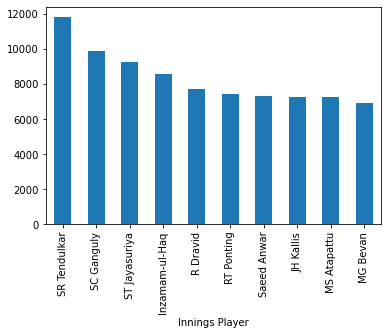

In [39]:
sachin_era_top10.plot(kind="bar")
plt.show()

In [40]:
#  top 10 run scorers of virat's era
virat_era_top10 = virat_era_df.groupby(["Innings Player"])["Innings Runs Scored Num"].sum().sort_values(ascending=False).head(10)
virat_era_top10

Innings Player
V Kohli           11247
RG Sharma          8083
HM Amla            7745
TM Dilshan         7296
KC Sangakkara      7275
AB de Villiers     7247
LRPL Taylor        7059
MS Dhoni           6838
EJG Morgan         6748
MJ Guptill         6626
Name: Innings Runs Scored Num, dtype: int32

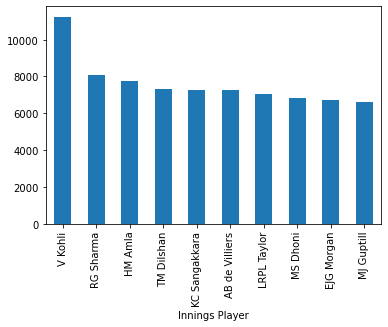

In [41]:
virat_era_top10.plot(kind="bar")
plt.show()

Year
1994    1089
1995     444
1996    1611
1997    1011
1998    1894
1999     843
2000    1328
2001     904
2002     741
2003    1141
2004     812
Name: Innings Runs Scored Num, dtype: int32


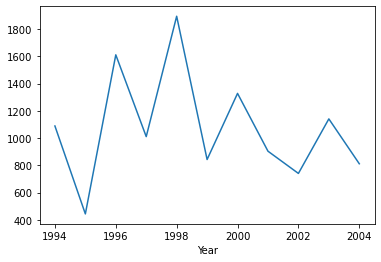

In [42]:
# yearly runs scored by Sachin
sachin_yearly = sachin_data.groupby(["Year"])["Innings Runs Scored Num"].sum()
print(sachin_yearly)
sachin_yearly.plot(kind="line")
plt.show()

Year
2009     325
2010     995
2011    1381
2012    1026
2013    1268
2014    1054
2015     623
2016     739
2017    1460
2018    1202
2019    1174
Name: Innings Runs Scored Num, dtype: int32


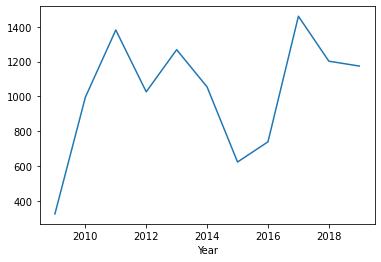

In [43]:
# yearly runs scored by Virat
virat_yearly = virat_data.groupby(["Year"])["Innings Runs Scored Num"].sum()
print(virat_yearly)
virat_yearly.plot(kind="line")
plt.show()

### Normalization

- We can't compare them on the basis of these absolute values as they belong to different groups
- We have to calcuate some relative data for comparision
- We will find the data relative to the players of the same era

##### RPI

In [44]:
# Sachin

In [45]:
sachin_rpi

43.608856088560884

In [46]:
non_sachin_df = sachin_era_df[sachin_era_df["Innings Player"] != "SR Tendulkar"]

In [47]:
non_sachin_rpi = sum(non_sachin_df["Innings Runs Scored Num"]) / len(non_sachin_df)
non_sachin_rpi

22.43512946754194

In [48]:
# normalized RPI
sachin_nrpi = sachin_rpi / non_sachin_rpi
sachin_nrpi

1.9437755485945407

In [49]:
# Virat

In [50]:
virat_rpi

50.20982142857143

In [51]:
non_virat_df = virat_era_df[virat_era_df["Innings Player"] != "V Kohli"]

In [52]:
non_virat_rpi = sum(non_virat_df["Innings Runs Scored Num"]) / len(non_virat_df)
non_virat_rpi

24.737756786500366

In [53]:
# normalized RPI
virat_nrpi = virat_rpi / non_virat_rpi
virat_nrpi

2.029683688052565

##### StrikeRate

In [54]:
# Sachin

In [55]:
sachin_sr

88.21377920429947

In [56]:
sachin_peer_sr = 100*(sum(non_sachin_df["Innings Runs Scored Num"])/sum(non_sachin_df["Innings Balls Faced"]))
sachin_peer_sr

72.33808936558636

In [57]:
# normalized Strike Rate
sachin_nsr = sachin_sr / sachin_peer_sr
sachin_nsr

1.2194651528391862

In [58]:
# Virat

In [59]:
virat_sr

93.56126778138258

In [60]:
virat_peer_sr = 100*(sum(non_virat_df["Innings Runs Scored Num"])/sum(non_virat_df["Innings Balls Faced"]))
virat_peer_sr

83.42743413330611

In [61]:
# normalized Strike Rate
virat_nsr = virat_sr / virat_peer_sr
virat_nsr

1.1214688399967323

##### 100's : Number of matches to score a 100

In [62]:
# Sachin

In [63]:
# matches to score a 100 - Sachin
sachin_ms100 = len(sachin_data)/sachin_100
sachin_ms100

7.324324324324325

In [64]:
# matches to score a 100 - Sachin's peers
sachin_peer_ms100 = len(non_sachin_df)/int(sum(non_sachin_df["100's"]))
sachin_peer_ms100

47.377969762419006

In [65]:
# normalized matches to score a 100
sachin_nms100 = sachin_ms100 / sachin_peer_ms100
sachin_nms100

0.15459346107595562

In [66]:
# Virat

In [67]:
# matches to score a 100 - Virat
virat_ms100 = len(virat_data)/virat_100
virat_ms100

5.333333333333333

In [68]:
# matches to score a 100 - Virat's peers
virat_peer_ms100 = len(non_virat_df)/sum(non_virat_df["100's"])
virat_peer_ms100

29.311827956989248

In [69]:
# normalized matches to score a 100
virat_nms100 = virat_ms100 / virat_peer_ms100
virat_nms100

0.18195157740278795

##### 50's : Number of matches to score a 50

In [70]:
# Sachin

In [71]:
# matches to score a 50 - Sachin
sachin_ms50 = len(sachin_data)/sachin_50
sachin_ms50

4.754385964912281

In [72]:
# matches to score a 50 - Sachin's peers
sachin_peer_ms50 = len(non_sachin_df)/int(sum(non_sachin_df["50's"]))
sachin_peer_ms50

8.33751425313569

In [73]:
# normalized matches to score a 50
sachin_nms50 = sachin_ms50 / sachin_peer_ms50
sachin_nms50

0.5702402203539483

In [74]:
# Virat

In [75]:
# matches to score a 50 - Virat
virat_ms50 = len(virat_data)/virat_50
virat_ms50

4.226415094339623

In [76]:
# matches to score a 50 - Virat's peers
virat_peer_ms50 = len(non_virat_df)/sum(non_virat_df["50's"])
virat_peer_ms50

7.673469387755102

In [77]:
# normalized matches to score a 50
virat_nms50 = virat_ms50 / virat_peer_ms50
virat_nms50

0.5507828181453231

### Final Analysis ( Normalized )

- Based on the below time frames :
    - Sachin : 1994-2004
    - Virat : 2009-2019

##### Sachin

In [78]:
print("Runs/Innings : ", sachin_nrpi)
print("Strike Rate : ", sachin_nsr)
print("Matches to score a 100 : ", sachin_nms100)
print("Matches to score a 50 : ", sachin_nms50)
print("Team Contribution : ", sachin_tc)

Runs/Innings :  1.9437755485945407
Strike Rate :  1.2194651528391862
Matches to score a 100 :  0.15459346107595562
Matches to score a 50 :  0.5702402203539483
Team Contribution :  0.16951875493078963


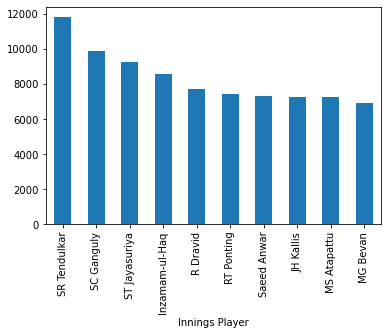

In [79]:
# where do sachin stand among his peers
sachin_era_top10.plot(kind="bar")
plt.show()

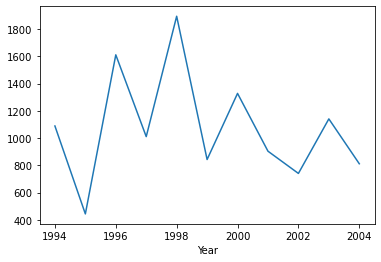

In [80]:
# yearly runs scored by Sachin (consistancy  to score 1000+ runs/year)
sachin_yearly = sachin_data.groupby(["Year"])["Innings Runs Scored Num"].sum()
sachin_yearly.plot(kind="line")
plt.show()

##### Virat

In [81]:
print("Runs/Innings : ", virat_nrpi)
print("Strike Rate : ", virat_nsr)
print("Matches to score a 100 : ", virat_nms100)
print("Matches to score a 50 : ", virat_nms50)
print("Team Contribution : ", virat_tc)

Runs/Innings :  2.029683688052565
Strike Rate :  1.1214688399967323
Matches to score a 100 :  0.18195157740278795
Matches to score a 50 :  0.5507828181453231
Team Contribution :  0.17610033350556625


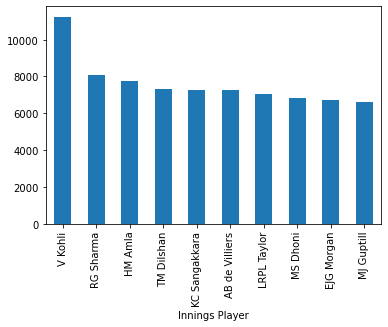

In [82]:
# where do virat stand among his peers
virat_era_top10.plot(kind="bar")
plt.show()

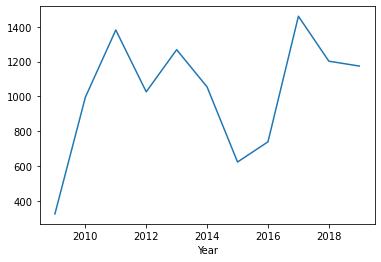

In [83]:
# yearly runs scored by Virat (consistancy  to score 1000+ runs/year)
virat_yearly = virat_data.groupby(["Year"])["Innings Runs Scored Num"].sum()
virat_yearly.plot(kind="line")
plt.show()

In [84]:
sachin = [sachin_nrpi, sachin_nsr, sachin_nms100, sachin_nms50, sachin_tc]
virat = [virat_nrpi, virat_nsr, virat_nms100, virat_nms50, virat_tc]

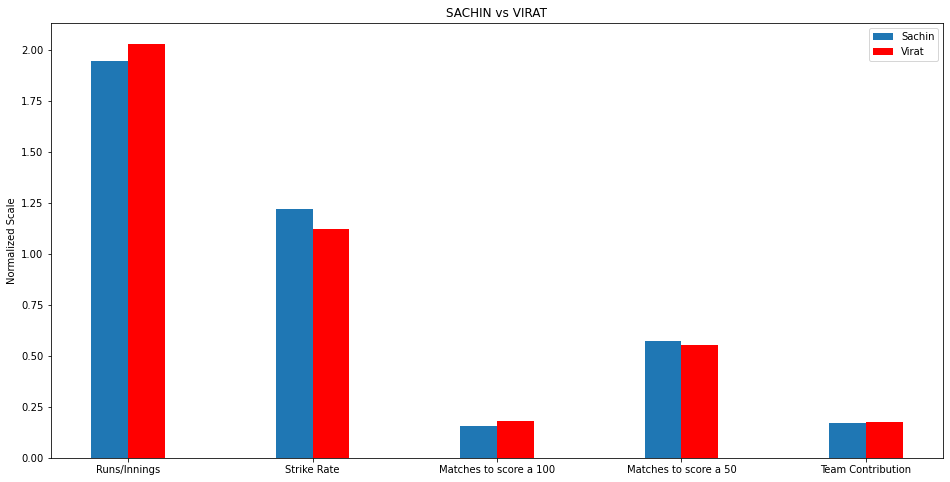

In [93]:
# final plot

index = np.arange(5)
bar_width = 0.2

plt_fig=plt.figure(figsize=(16,8))
ax=plt_fig.add_subplot()
    
sachin_plot = ax.bar(index, sachin, bar_width, label="Sachin")

winter = ax.bar(index+bar_width, virat, bar_width, label="Virat", color="red")

ax.set_ylabel('Normalized Scale')
ax.set_title('SACHIN vs VIRAT')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Runs/Innings", "Strike Rate", "Matches to score a 100", "Matches to score a 50", "Team Contribution"])
ax.legend()
plt.show()

##### Key Points
- Virat is having more Runs per Innings.
- Sachin is having better Strike Rate.
- Sachin takes less matches to score a 100.
- Virat takes less matches to score a 50.
- Virat is having slightly more contribution in the team.

> Out of 5 paramaters : Sachin - 2 and Virat - 3

##### Additional Points
- Virat is more consistent in scoring 1000+ runs/year ( 7 times 1000+ runs/year and a close call of 995 runs)
- Virat stands in a strong position among his peers with a larger run difference.

#### After this analysis the winner is : 

### Virat Kohli